In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

In [2]:
df = pd.read_csv('C:/Users/derek/Desktop/beer_reviews.csv')
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [3]:
df.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [4]:
for col in df.columns:
  print(col, len(df[col].unique()))

brewery_id 5840
brewery_name 5743
review_time 1577960
review_overall 10
review_aroma 9
review_appearance 10
review_profilename 33388
beer_style 104
review_palate 9
review_taste 9
beer_name 56857
beer_abv 531
beer_beerid 66055


In [5]:
df = df.dropna()
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [6]:
df = df[['review_overall','review_aroma', 'review_appearance','review_palate', 'review_taste','beer_abv']]
df.shape

(1518478, 6)

In [7]:
df.head()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
0,1.5,2.0,2.5,1.5,1.5,5.0
1,3.0,2.5,3.0,3.0,3.0,6.2
2,3.0,2.5,3.0,3.0,3.0,6.5
3,3.0,3.0,3.5,2.5,3.0,5.0
4,4.0,4.5,4.0,4.0,4.5,7.7


In [18]:
X = df[['review_aroma', 'review_appearance','review_palate', 'review_taste','beer_abv']]
Y = df['review_overall']
Y = Y > np.average(Y)

Xa = X[:1000]
Ya = Y[:1000] 

Xb = X[:10000]
Yb = Y[:10000] 

Xc = X[:100000]
Yc = Y[:100000] 

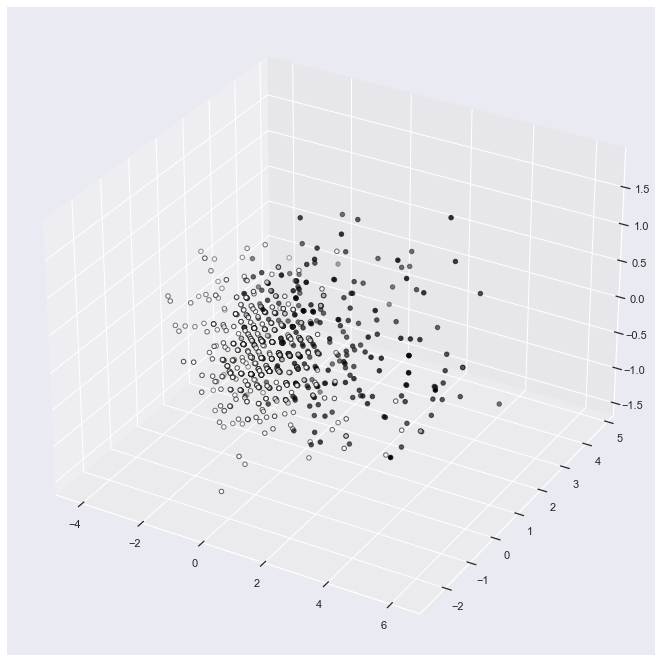

In [19]:
fig = plt.figure(figsize=(12,9))
ax = Axes3D(fig)
pca1 = decomposition.PCA(n_components=3)
pca1.fit(Xa)
X1 = pca1.transform(Xa)

# Reorder the labels to have colors matching the cluster results
y = np.choose(Ya, [0, 1]).astype(float)
ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c=y, cmap=plt.cm.binary_r,
           edgecolor='k')

plt.show()

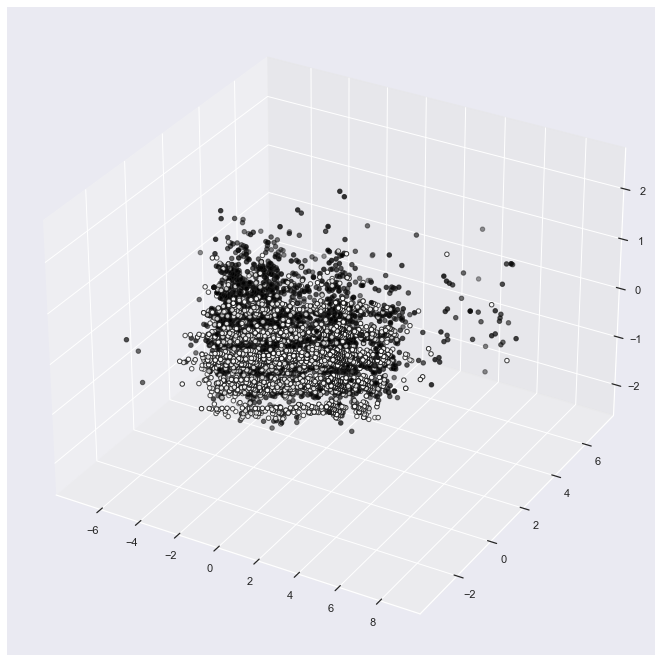

In [20]:
fig = plt.figure(figsize=(12,9))
ax = Axes3D(fig)
pca1 = decomposition.PCA(n_components=3)
pca1.fit(Xb)
X1 = pca1.transform(Xb)

# Reorder the labels to have colors matching the cluster results
y = np.choose(Yb, [0, 1]).astype(float)
ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c=y, cmap=plt.cm.binary_r,
           edgecolor='k')

plt.show()

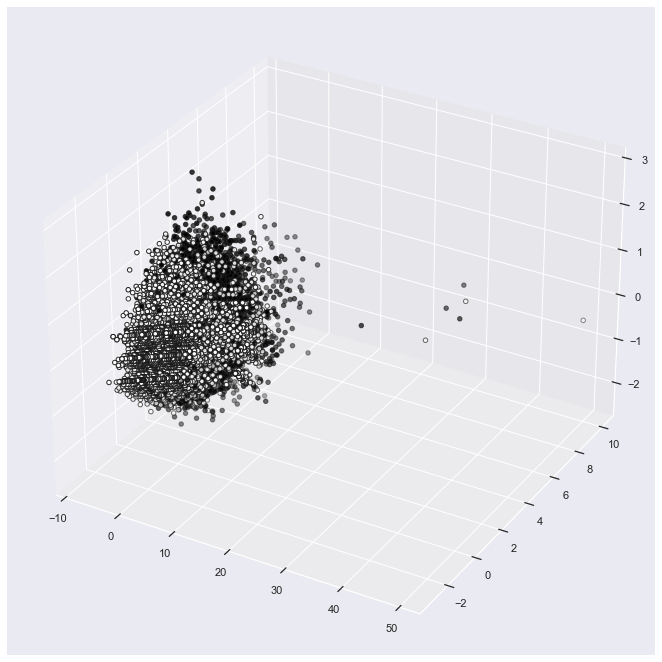

In [21]:
fig = plt.figure(figsize=(12,9))
ax = Axes3D(fig)
pca1 = decomposition.PCA(n_components=3)
pca1.fit(Xc)
X1 = pca1.transform(Xc)

# Reorder the labels to have colors matching the cluster results
y = np.choose(Yc, [0, 1]).astype(float)
ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c=y, cmap=plt.cm.binary_r,
           edgecolor='k')

plt.show()

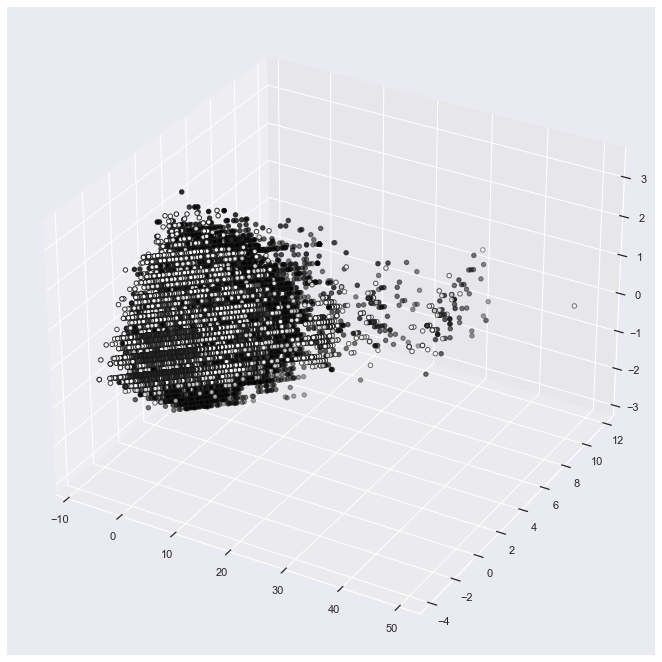

In [26]:
fig = plt.figure(figsize=(12,9))
ax = Axes3D(fig)
pca1 = decomposition.PCA(n_components=3)
pca1.fit(X)
X1 = pca1.transform(X)

# Reorder the labels to have colors matching the cluster results
y = np.choose(Y, [0, 1]).astype(float)
ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c=y, cmap=plt.cm.binary_r,
           edgecolor='k')

plt.show()

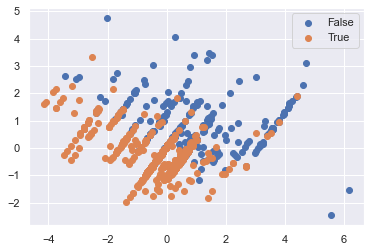

In [22]:
pca2 = decomposition.PCA(n_components=2)
pca2.fit(Xa)
X2 = pca2.transform(Xa)

fig, ax = plt.subplots()
for y in np.unique(Ya):
    i = np.where(Ya == y)[0]
    ax.scatter(X2[:,0][i], X2[:,1][i], label=y)
ax.legend()
plt.show()

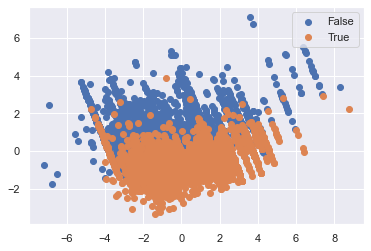

In [23]:
pca2 = decomposition.PCA(n_components=2)
pca2.fit(Xb)
X2 = pca2.transform(Xb)

fig, ax = plt.subplots()
for y in np.unique(Yb):
    i = np.where(Yb == y)[0]
    ax.scatter(X2[:,0][i], X2[:,1][i], label=y)
ax.legend()
plt.show()

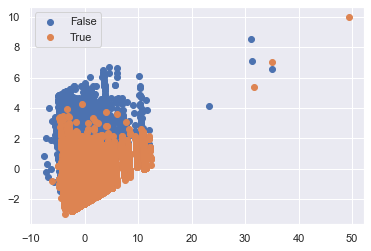

In [24]:
pca2 = decomposition.PCA(n_components=2)
pca2.fit(Xc)
X2 = pca2.transform(Xc)

fig, ax = plt.subplots()
for y in np.unique(Yc):
    i = np.where(Yc == y)[0]
    ax.scatter(X2[:,0][i], X2[:,1][i], label=y)
ax.legend()
plt.show()

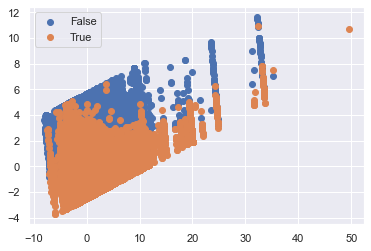

In [25]:
pca2 = decomposition.PCA(n_components=2)
pca2.fit(X)
X2 = pca2.transform(X)

fig, ax = plt.subplots()
for y in np.unique(Y):
    i = np.where(Y == y)[0]
    ax.scatter(X2[:,0][i], X2[:,1][i], label=y)
ax.legend()
plt.show()